## Imports

In [14]:
import cv2 
import matplotlib.pyplot as plt
import pandas as pd
import json
import time
import numpy as np
import os
from PIL import Image
import pytesseract
from pytesseract import Output
import torch
from tkinter import Tk

## Configurations

In [15]:
#Necessary to run with BASE kernel
pytesseract.pytesseract.tesseract_cmd = r'/opt/homebrew/bin/tesseract'

In [16]:
model = torch.hub.load('ultralytics/yolov5', 'custom', 'last.pt') 

Using cache found in /Users/catalina/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-7-2 Python-3.9.7 torch-1.11.0 CPU

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients
Adding AutoShape... 


In [17]:
# https://towardsdatascience.com/text-similarity-w-levenshtein-distance-in-python-2f7478986e75
def lev_dist(a, b):

    def min_dist(s1, s2):

        if s1 == len(a) or s2 == len(b):
            return len(a) - s1 + len(b) - s2

        # no change required
        if a[s1] == b[s2]:
            return min_dist(s1 + 1, s2 + 1)

        return 1 + min(
            min_dist(s1, s2 + 1),      # insert character
            min_dist(s1 + 1, s2),      # delete character
            min_dist(s1 + 1, s2 + 1),  # replace character
        )


        
    return min_dist(0, 0)

In [18]:
# Definición del diccionario
def containsNumber(value):
    for character in value:
        if character.isdigit():
            return True
    return False

new_dict = ['Bewohner', 'mit', 'Parkschein', 'Parkausweis','frei','Mo-Fr', 'Mo', 'Fr','Mo - Fr','Sa', 'automat', '8-20h', '8-22h', 'Std', 'Std.']
numbers_list = ['8-20h']
n_words = len(new_dict)

# START

In [48]:
# BORRAR RESULTADOS ANTERIORES
palabras_encontradas = []

for f in os.listdir(r"Results/crops/Sign/"):
    if not f.endswith(".jpg"):
        continue
    os.remove(os.path.join("Results/crops/Sign/", f))

for f in os.listdir(r"Results"):
    if not f.endswith(".jpg"):
        continue
    os.remove(os.path.join("Results", f))

In [49]:
from tkinter.filedialog import askopenfilename
import requests
import imutils
url = "http://192.168.188.49:8080/shot.jpg"

# Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
# im = askopenfilename() # show an "Open" dialog box and return the path to the selected file
# print(im)


img_resp = requests.get(url)
img_arr = np.array(bytearray(img_resp.content), dtype=np.uint8)
img = cv2.imdecode(img_arr, -1)
img = imutils.resize(img, width=1000, height=1800)
cv2.imshow("Android_cam", img)

In [50]:
#Ejecutar la predicción de una imagen
# im = 'Imagenes/IMG_20220328_175050.jpg'
results = model(img)
results.crop(save=True,save_dir='Results')

Saved 1 image to Results
Saved results to Results



[]

## Image load

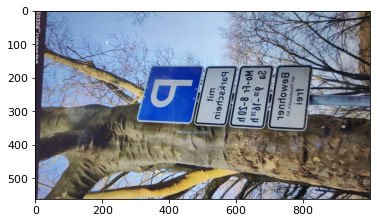

In [51]:
# file_list=os.listdir(r"Results/crops/Sign/")
# image_path = os.path.join("Results/crops/Sign/", file_list[0])
# # print(image_path)
# img = cv2.imread(image_path)
# img_original=img.copy()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Image pre-processing

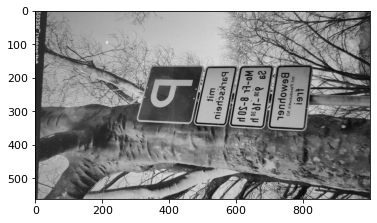

In [52]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,cmap="gray")

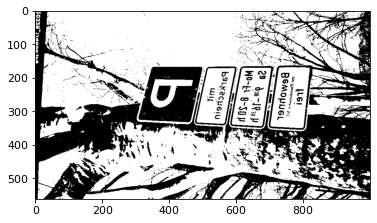

In [53]:
# Convert to black and white - Reload img
thresh, img_bw = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY)
new_img = img_bw.astype(np.uint8)
plt.imshow(new_img,cmap="gray")

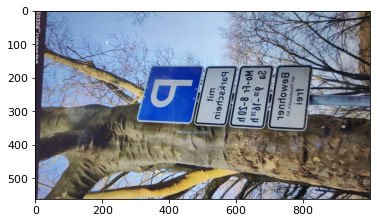

In [54]:
#See original image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Number of Contours found = 2729


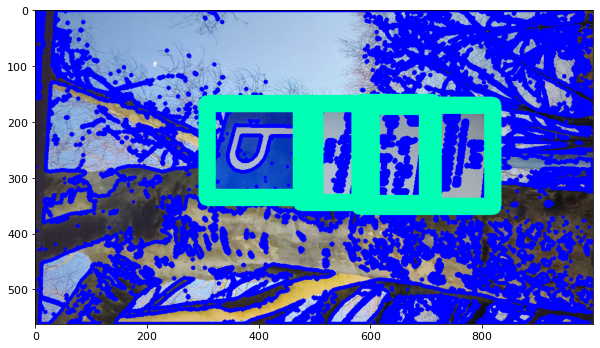

In [55]:
# FIND CONTOURS
#im2, cnt, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE) - not enough values to unpack (expected 3, got 2)
cnt, hierarchy = cv2.findContours(new_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print("Number of Contours found = " + str(len(cnt)))
sorted_cnt = sorted(cnt, key=cv2.contourArea, reverse=True)

# #The follwing lines modify img as well
img_cnt = cv2.drawContours(img, cnt, -1, 255, 5)

x = [5]
y = [5]
w = [5]
h = [5]

x,y,w,h = cv2.boundingRect(sorted_cnt[1])
cv2.rectangle(img_cnt,(x,y),(x+w,y+h),(180,255,0),30)
cropped_A = new_img[y:y+h, x:x+w]

x,y,w,h = cv2.boundingRect(sorted_cnt[2])
cv2.rectangle(img_cnt,(x,y),(x+w,y+h),(180,255,0),30)
cropped_B = new_img[y:y+h, x:x+w]

x,y,w,h = cv2.boundingRect(sorted_cnt[3])
cv2.rectangle(img_cnt,(x,y),(x+w,y+h),(180,255,0),30)
cropped_C = new_img[y:y+h, x:x+w]

x,y,w,h = cv2.boundingRect(sorted_cnt[4])
cv2.rectangle(img_cnt,(x,y),(x+w,y+h),(180,255,0),30)
cropped_D = new_img[y:y+h, x:x+w]

x,y,w,h = cv2.boundingRect(sorted_cnt[5])
cv2.rectangle(img_cnt,(x,y),(x+w,y+h),(180,255,0),30)
cropped_E = new_img[y:y+h, x:x+w]

plt.figure(figsize = (10,10))
plt.imshow(cv2.cvtColor(img_cnt, cv2.COLOR_BGR2RGB))

cropped_list = [cropped_A, cropped_B, cropped_C, cropped_D, cropped_D, cropped_E]

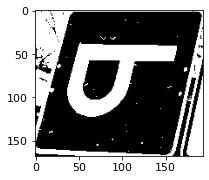

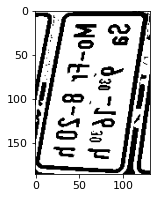

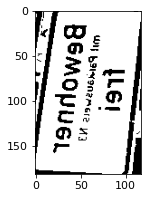

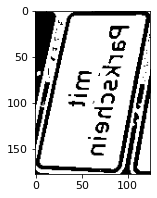

In [56]:
# PRINT COUNTOURS
plt.figure(figsize = (3,3))
plt.imshow(cv2.cvtColor(cropped_A, cv2.COLOR_BGR2RGB))
plt.figure(figsize = (3,3))
plt.imshow(cv2.cvtColor(cropped_B, cv2.COLOR_BGR2RGB))
plt.figure(figsize = (3,3))
plt.imshow(cv2.cvtColor(cropped_C, cv2.COLOR_BGR2RGB))
plt.figure(figsize = (3,3))
plt.imshow(cv2.cvtColor(cropped_D, cv2.COLOR_BGR2RGB))

## Detección de palabras

In [57]:
# Extracción de palabras
custom_config = r'--oem 3 --psm 11'
for cropped_X in cropped_list:
   image_to_read = cropped_X

   d = pytesseract.image_to_data(image_to_read, config=custom_config, lang='deu', output_type=Output.DICT)
   # Data to Text
   n_boxes = len(d['text'])
   print('Palabras encontradas:')

   for i in range(n_boxes):
      if int(float(d['conf'][i])) > 0:
            for j in range(n_words):
               if (lev_dist(new_dict[j],d['text'][i]) <= 1):
                  print(new_dict[j],' - ', d['conf'][i])
                  palabras_encontradas.append(new_dict[j])
                  (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
                  image_to_read = cv2.rectangle(image_to_read, (x, y), (x + w, y + h), (0, 255, 0), 2)

   d = pytesseract.image_to_data(image_to_read, config=custom_config, lang='deu', output_type=Output.DICT)
   # Data to Text
   n_boxes = len(d['text'])
   print('Palabras encontradas:')

   for i in range(n_boxes):
      if int(float(d['conf'][i])) > 0:
            for j in range(n_words):
               if (lev_dist(new_dict[j],d['text'][i]) <= 1):
                  print(new_dict[j],' - ', d['conf'][i])
                  palabras_encontradas.append(new_dict[j])
                  (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
                  image_to_read = cv2.rectangle(image_to_read, (x, y), (x + w, y + h), (0, 255, 0), 2)

   # for i in range(n_boxes):
   #    if int(float(d['conf'][i])) > 0:
   #          if (containsNumber(d['text'][i])):
   #             print(d['text'][i]+' % '+d['conf'][i])
   #             palabras_encontradas.append(d['text'][i])
   #             (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
   #             image_to_read = cv2.rectangle(image_to_read, (x, y), (x + w, y + h), (0, 255, 0), 2)
   #          else:
   #             for j in range(n_words):
   #                if (lev_dist(new_dict[j],d['text'][i]) <= 1):
   #                   print(new_dict[j],' - ', d['conf'][i])
   #                   palabras_encontradas.append(new_dict[j])
   #                   (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
   #                   image_to_read = cv2.rectangle(image_to_read, (x, y), (x + w, y + h), (0, 255, 0), 2)


   # d = pytesseract.image_to_data(image_to_read, config=custom_config, lang='deu', output_type=Output.DICT)
   # # Data to Text
   # n_boxes = len(d['text'])
   # for i in range(n_boxes):
   #    if int(float(d['conf'][i])) > 0:
   #          if (containsNumber(d['text'][i])):
   #             print(d['text'][i]+' % '+d['conf'][i])
   #             (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
   #             image_to_read = cv2.rectangle(image_to_read, (x, y), (x + w, y + h), (0, 255, 0), 2)
   #          else:
   #             for j in range(n_words):
   #                if (lev_dist(new_dict[j],d['text'][i]) <= 1):
   #                   print(new_dict[j],' - ', d['conf'][i])
   #                   palabras_encontradas.append(new_dict[j])
   #                   (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
   #                   image_to_read = cv2.rectangle(image_to_read, (x, y), (x + w, y + h), (0, 255, 0), 2)

# plt.figure(figsize = (3,3))
# plt.imshow(cv2.cvtColor(image_to_read, cv2.COLOR_BGR2RGB))

Palabras encontradas:
Palabras encontradas:
Palabras encontradas:
Mo  -  83.374153
Sa  -  56.136169
Mo  -  32.825714
Palabras encontradas:
Sa  -  53.311726
Palabras encontradas:
Fr  -  21.033051
Palabras encontradas:
Fr  -  16.680740
Palabras encontradas:
Palabras encontradas:
Palabras encontradas:
Palabras encontradas:
Palabras encontradas:
Palabras encontradas:


In [58]:
pal_enc = set(palabras_encontradas)
print(pal_enc)

{'Mo', 'Sa', 'Fr'}


In [59]:
# pal_enc.add('Parkschein')
# print(pal_enc)

## Lógica y Respuesta

In [60]:
import datetime as dt
now = dt.datetime.now()

Bewohner = False
Dia = False
Std = False
Parkschein = False
Respuesta = True

if 'Bewohner' in pal_enc or 'Parkausweis' in pal_enc or 'mit' in pal_enc:
    Respuesta = False
    Bewohner = True

hour = now.hour
weekday = now.weekday()
#weekday = 3
if 'Mo-Fr' in pal_enc or 'Sa' in pal_enc or 'Fr' in pal_enc or 'Mo' in pal_enc:
    if 'Mo-Fr' in pal_enc and weekday < 5:
        if '8-20h' in pal_enc and (hour < 20 and hour>8):
            Dia = True
    elif 'Sa' in pal_enc and weekday == 5:
        Dia = True
        Respuesta = True

if 'Std.' in pal_enc or 'Std' in pal_enc:
    Std = True
    Respuesta = True

if 'Parkschein' in pal_enc:
    Parkschein = True
    Respuesta = True

print("Bewohner:", Bewohner)
print("Dia:", Dia)
print("Std:", Std)
print("Parkschein:", Parkschein)
print("Respuesta:", Respuesta)

Bewohner: False
Dia: False
Std: False
Parkschein: False
Respuesta: True


In [61]:
if Respuesta:
    print("Sí puedes  estacionar :), pero:")
    if Parkschein:
        print("Debes comprar el tiquete")
    if Std:
        print("Debes usar el parquímetro")
    if Dia:
        print("Solo en las horas indicadas")
else:
    print("No puedes estacionar :(")

Sí puedes  estacionar :), pero:
